In [1]:
# to illustrate the lead time correction idea

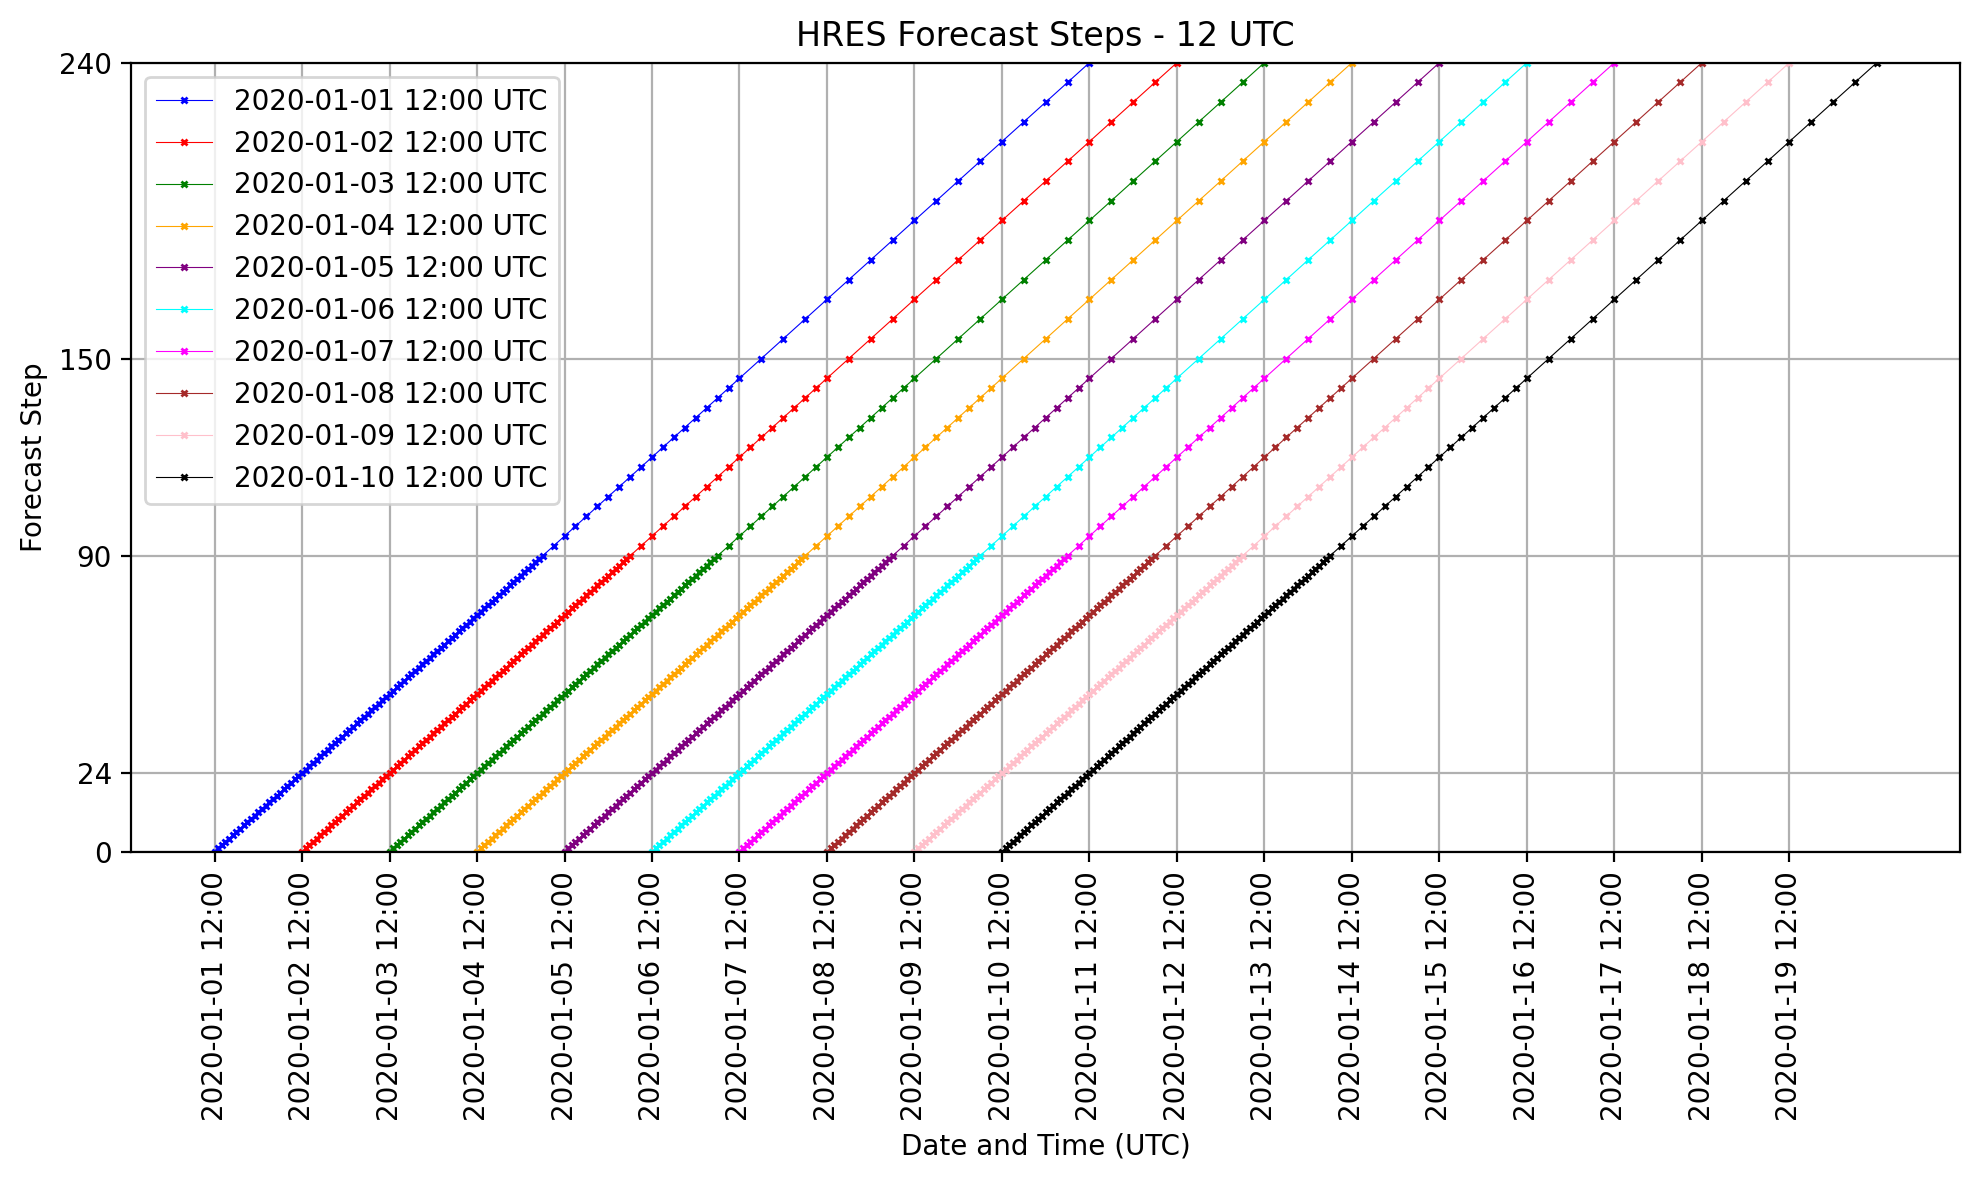

In [1]:
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

def generate_forecast_times(start_date, forecast_steps):
    return [start_date + timedelta(hours=step) for step in forecast_steps]

def plot_forecast(run_times, forecast_steps, label, color):
    plt.plot(run_times, forecast_steps, marker='x', linestyle='-', color=color, label=label, ms=2, lw=0.4)

def set_plot_properties(start_date, end_date):
    plt.title('HRES Forecast Steps - 12 UTC')
    plt.xlabel('Date and Time (UTC)')
    plt.ylabel('Forecast Step')

    six_hourly_ticks = [start_date + timedelta(hours=i*24) for i in range(int((end_date - start_date).total_seconds() // 3600 // 24))]
    plt.xticks(six_hourly_ticks, [time.strftime('%Y-%m-%d %H:%M') for time in six_hourly_ticks], rotation=90)
    plt.ylim(0, 240)
    plt.yticks([0, 24, 90, 150, 240])

    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Define the starting date and time for each run
start_dates = [
    datetime(year=2020, month=1, day=1, hour=12),
    datetime(year=2020, month=1, day=2, hour=12),
    datetime(year=2020, month=1, day=3, hour=12),
    datetime(year=2020, month=1, day=4, hour=12),
    datetime(year=2020, month=1, day=5, hour=12),
    datetime(year=2020, month=1, day=6, hour=12),
    datetime(year=2020, month=1, day=7, hour=12),
    datetime(year=2020, month=1, day=8, hour=12),
    datetime(year=2020, month=1, day=9, hour=12),
    datetime(year=2020, month=1, day=10, hour=12)
]

# End date and time
end_date = datetime(year=2020, month=1, day=20, hour=12)

# Step frequency for 12 UTC for each run
forecast_steps = [list(range(0, 91)) + list(range(93, 145, 3)) + list(range(150, 241, 6)) for _ in range(10)]

# Calculate the date and time for each forecast step for each run
forecast_times = [generate_forecast_times(start_date, steps) for start_date, steps in zip(start_dates, forecast_steps)]

# Plotting the forecast steps against the corresponding times for each run
colors = ['blue', 'red', 'green', 'orange', 'purple', 'cyan', 'magenta', 'brown', 'pink', 'black']
labels = ['2020-01-01 12:00 UTC', '2020-01-02 12:00 UTC', '2020-01-03 12:00 UTC', '2020-01-04 12:00 UTC', '2020-01-05 12:00 UTC', '2020-01-06 12:00 UTC', '2020-01-07 12:00 UTC', '2020-01-08 12:00 UTC', '2020-01-09 12:00 UTC', '2020-01-10 12:00 UTC']

plt.figure(figsize=(10, 6), dpi=200)

for run_times, steps, label, color in zip(forecast_times, forecast_steps, labels, colors):
    plot_forecast(run_times, steps, label, color)

# Setting plot properties
set_plot_properties(start_dates[0], end_date)
